# Note : 
this project is done by me,ismail said , and I have inspired from a public  notebook  corresponding to this dataset in order to have a better methodology ans understanding of how does feature engineering ans modeling works in real life problems 

# Predictive Marketing 
In this project we will use unsupervized machine learning in order to categorize costumers based on some features of their purchase behavior  

# Data understanding :

In [3]:
#     order_id – (A unique number to identity the order)
#     user_id - (A unique number to identify the user)
#     order_number – (Number of the order)
#     order_dow – (Day of the Week the order was made)
#     order_hour_of_day – (Time of the order)
#     days_since_prior_order - (History of the order)
#     product_id – (Id of the product)
#     add_to_cart_order – (Number of items added to cart)
#     reordered – (If the reorder took place)
#     department_id - (Unique number allocated to each department)
#     department – (Names of the departments)
#     product_name – (Name of the products)
    


# to further understand the data we will be doing the below steps :

In [4]:
# Importing packages
# Loading data
# Get information on the data
# Conducting summary statistics
# Taking care of Null values
# Converting data types

In [5]:
#importing packages  :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans , k_means
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Loading data 
main_data= pd.read_csv('C:\\Users\\ismai\\Desktop\\Predictive marketing\\ECommerce_consumer behaviour.csv')
df=main_data.copy()
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [7]:
#getting some info about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [8]:
#detecting which columns have missing values 
df.isnull().sum()
#it shows 124342 for the days_since_prior_order  column but I runned the code 
#changing some stuff 

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [9]:
df.shape

(2019501, 12)

In [10]:
print(124342/2019501)

0.06157065532525114


# Note:
from the above summary we can say that we have null values only in the  days_since_prior_order column which is 6.15% of the entitre dataset

In [11]:
#displaying the possiblities og the data corresponding to the 'days_since_prior_order' column 
df['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [12]:
# for col in df.columns:
#     if df[col].dtypes== 'float64':
df['days_since_prior_order'].fillna(-1,inplace=True)
#we set inplace to True to be able to update the original dataself itself

In [13]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [14]:
#displaying the occurence of each value  
counts=df['days_since_prior_order'].value_counts()
counts

 7.0     214126
 30.0    210814
 6.0     155685
 5.0     129089
 4.0     126250
-1.0     124342
 8.0     118722
 3.0     113263
 2.0      88737
 9.0      75120
 14.0     63414
 10.0     62073
 1.0      59200
 13.0     52204
 11.0     51476
 12.0     48171
 15.0     41531
 16.0     28632
 21.0     28359
 0.0      27673
 17.0     23921
 20.0     23234
 18.0     22777
 19.0     20140
 22.0     19950
 28.0     16459
 23.0     13779
 24.0     12833
 27.0     12804
 25.0     11832
 29.0     11590
 26.0     11301
Name: days_since_prior_order, dtype: int64

In [15]:
counts_noncastable=counts[counts.index%1!=0]
total=counts_noncastable.sum()
total


0

In [16]:
#we notice that we can cast the value to int without data loss(have 0 as fractional number)
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


# DATA PREPARATION
in this section we will focus on :

    -Investigating all elements within each feature
    
    -Aggregating & grouping values to visualize purchasing behaviour
    
    -Aggregating & grouping values to understand purchasing behaviour
    
    -Aggregating & grouping values to visualize & identify the most reordered items
    
    -Aggregating & grouping values to understand product reordered ratio
    
    -Aggregating & grouping values to visualize reordered ratio

In [17]:
#Investigating all elements within each feature
for column in df :
    unique_values =df[column].unique()
    nr_values =len(unique_values)
    if nr_values <22:
        print("The number of unique values for features {} : {} --- {}".format(column, nr_values,unique_values))
    else:
        print("The number of unique values for features {} : {}".format(column, nr_values))
    

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 --- [2 3 0 1 6 5 4]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 32
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 --- [0 1]
The number of unique values for features department_id : 21 --- [13 16  4 15 12  1  3  7 14 19  6 17 11 18 20  9 21  5  8 10  2]
The number of unique values for features department : 21 --- ['pantry' 'dairy eggs' 'produce' 'canned goods' 'meat seafood' 'frozen'
 'bakery' 'beverages' 'breakfast' 'snacks' 'international' 'household'
 'personal care' 'babies' 'deli' 'dry goods pasta' 'missing' 'alcohol'
 'pets' 'bulk' 'other']

In [18]:
df.columns 

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

In [19]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE PURCHASING BEHAVIOUR
grouped=df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()
grouped


5      14242
6      14146
4      13760
7      13695
8      12741
       ...  
95         1
83         1
137        1
100        1
87         1
Name: add_to_cart_order, Length: 82, dtype: int64

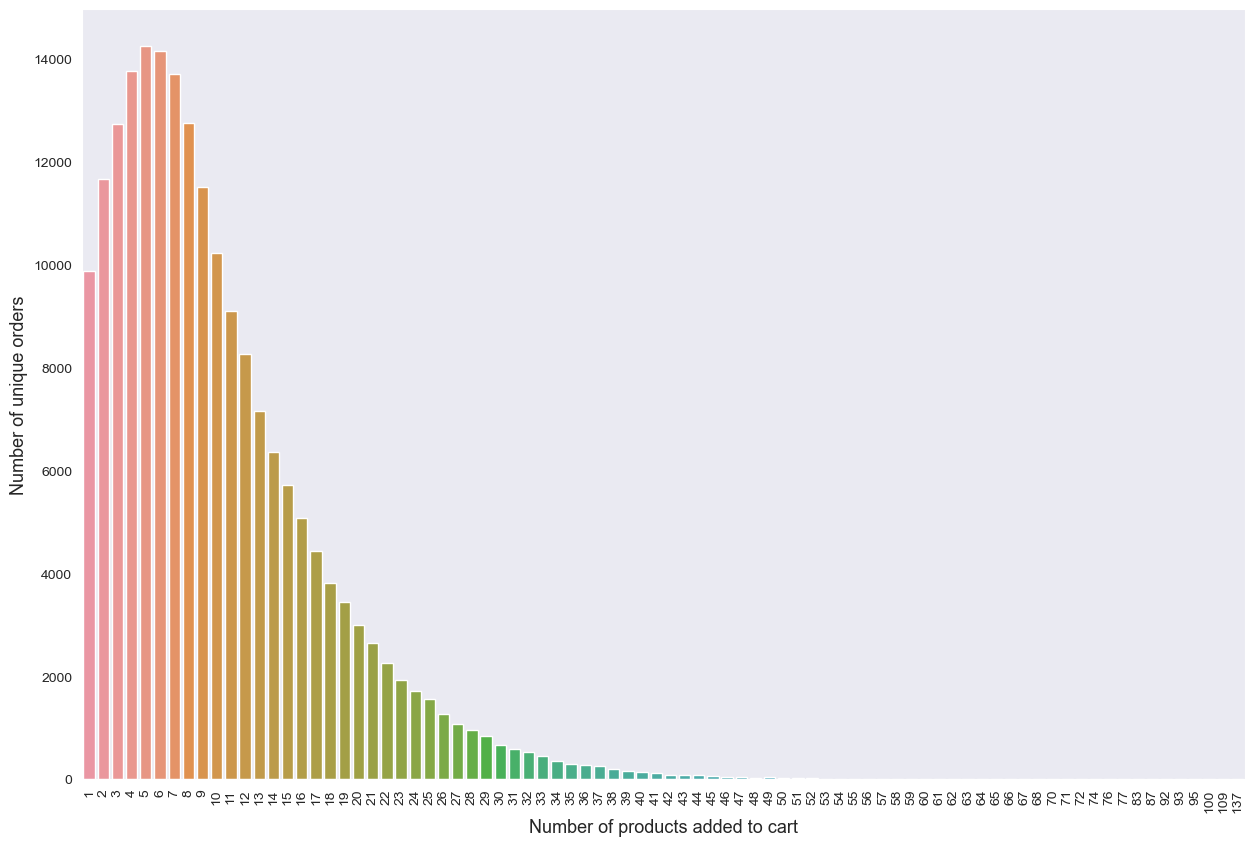

In [20]:
#plotting a significant figure that display the occurences of the different number of products
sns.set_style('dark')
f, ax = plt.subplots(figsize=(15, 10))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
sns.color_palette("husl", 10)
plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Number of products added to cart', fontsize=13)
plt.show()

# Note :
we could conclude that in average clients purchase 4 to 7 products  

In [21]:
counts=df['product_name'].value_counts()
counts
# grouped = df.groupby(["product_id","product_name","department"])["reordered"].aggregate('count').reset_index()
#the count agregte function returns the number of non-null values in a specific column
# grouped=grouped.sort_values(by="reordered",ascending=False)[:15].reset_index()
# grouped


fresh fruits                  226039
fresh vegetables              212611
packaged vegetables fruits    109596
yogurt                         90751
packaged cheese                61502
                               ...  
kitchen supplies                 561
baby bath body care              515
baby accessories                 504
beauty                           387
frozen juice                     279
Name: product_name, Length: 134, dtype: int64

In [22]:
grouped = df.groupby(["product_id","product_name","department"])["reordered"].aggregate('count').reset_index()
# the count agregte function returns the number of non-null values in a specific column
grouped=grouped.sort_values(by="reordered",ascending=False)[:15].reset_index()
grouped

,index,product_id,product_name,department,reordered
0,23,24,fresh fruits,produce,226039
1,82,83,fresh vegetables,produce,212611
2,122,123,packaged vegetables fruits,produce,109596
3,119,120,yogurt,dairy eggs,90751
4,20,21,packaged cheese,dairy eggs,61502
5,83,84,milk,dairy eggs,55150
6,114,115,water seltzer sparkling water,beverages,52564
7,106,107,chips pretzels,snacks,45306
8,90,91,soy lactosefree,dairy eggs,39389
9,111,112,bread,bakery,36381


# Note :
we can easily notice that produce,diary eggs and snaks are the most cosumed products

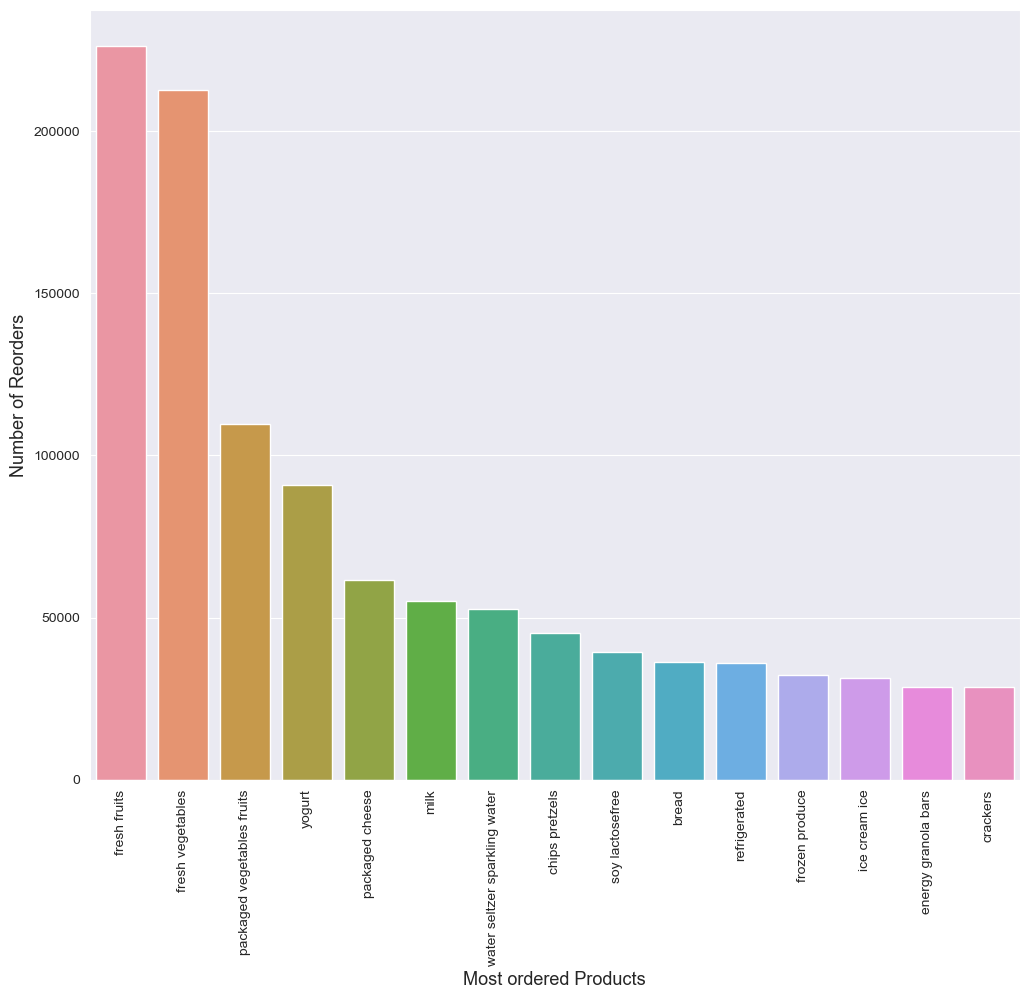

In [23]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE & IDENTIFY THE MOST REORDERED ITEMS
grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

# Note:
From the above analysis we could observe that "Fresh Fruits","Fresh Vegetables","Packaged Vegetables Fruits","Yogurt" & "Packaged Cheese" are top 5 most reordered products.

In [24]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PRODUCT REORDERED RATIO
grouped=df.groupby("reordered")["product_id"].aggregate('count').reset_index()
grouped['Ratio']=grouped["product_id"].apply(lambda x: x/grouped['product_id'].sum())
grouped

,reordered,product_id,Ratio
0,0,828515,0.410257
1,1,1190986,0.589743


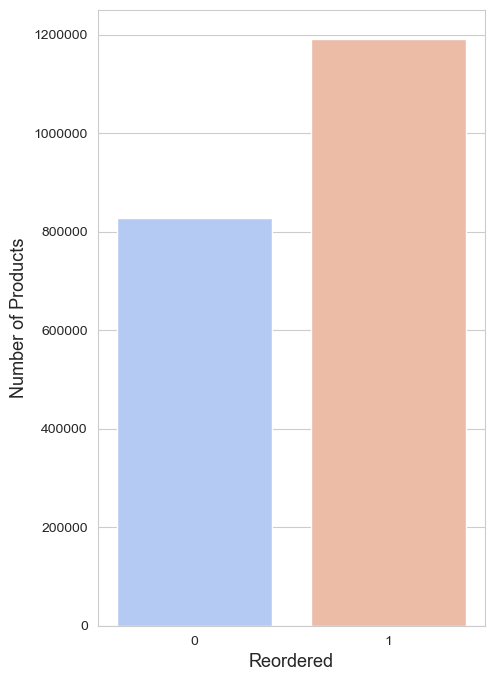

In [25]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE REORDERED RATIO
grouped  = grouped.groupby(['reordered']).sum()['product_id'].sort_values(ascending=False)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(grouped.index, grouped.values, palette='coolwarm')
plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Modeling using  k-means 
we will build a k-means clutering followed by PCA 
# what it's k-means and how does it work ?
K-means clustering is an unsupervised learning algorithm that divides a dataset into k clusters, where k is the number of clusters specified by the researcher. The goal of the algorithm is to minimize the sum of squared distances between the points in a cluster and the centroid of the cluster.

Here is an example of how K-means clustering might work:

Suppose we have a dataset with two features (x and y) and we want to use K-means to divide the data into two clusters. We start by randomly initializing two points (centroids) in the data. We then assign each data point to the cluster corresponding to the nearest centroid. Once all of the points have been assigned to a cluster, we compute the new centroids for each cluster by taking the mean of all of the points in the cluster. We then re-assign each data point to the cluster corresponding to the nearest centroid. This process is repeated until the centroids stop moving or the assignment of points to clusters stops changing.

In [26]:
len(df.product_id.unique())

134

# =>We have 134 products in this market 

In [27]:
# UNDERSTANDING DATA DISTRIBUTION BY USING CROSSTAB TO GET ROW WISE PROPORTION FOR EARCH DEPARTMENT
clst_prd=pd.crosstab(df['user_id'],df['department'])
clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
206206,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4


In [38]:
# RUNNING K-MEANS
X_train= clst_prd.values
kmeans=KMeans(n_clusters=6,random_state=540)
#random state is set in order to have a reproducible code (to have always  the same result)
kmeans= kmeans.fit(X_train)
print("The cluster are  :", kmeans.labels_)
print("The Inertia is :", kmeans.inertia_)

The cluster are  : [0 2 4 ... 0 2 4]
The Inertia is : 4996208.439176531


In [29]:
# RUNNING K-MEANS ON A RANG OF CLUSTERS TO FIND OPTIMAL NUMBER in the range [2..9]
no_of_clusters = range(2,10)
inertia =[]
for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

The inertia for : 2 Cluster is :  7543563.615122326
The inertia for : 3 Cluster is :  6284972.054315467
The inertia for : 4 Cluster is :  5731867.711694683
The inertia for : 5 Cluster is :  5281366.432549851
The inertia for : 6 Cluster is :  4996208.43917653
The inertia for : 7 Cluster is :  4763209.245284893
The inertia for : 8 Cluster is :  4586277.708068188
The inertia for : 9 Cluster is :  4436399.223713296


In [30]:
inertia

[7543563.615122326,
 6284972.054315467,
 5731867.711694683,
 5281366.432549851,
 4996208.43917653,
 4763209.245284893,
 4586277.708068188,
 4436399.223713296]

Text(0.5, 1.0, 'Inertia Plot per k')

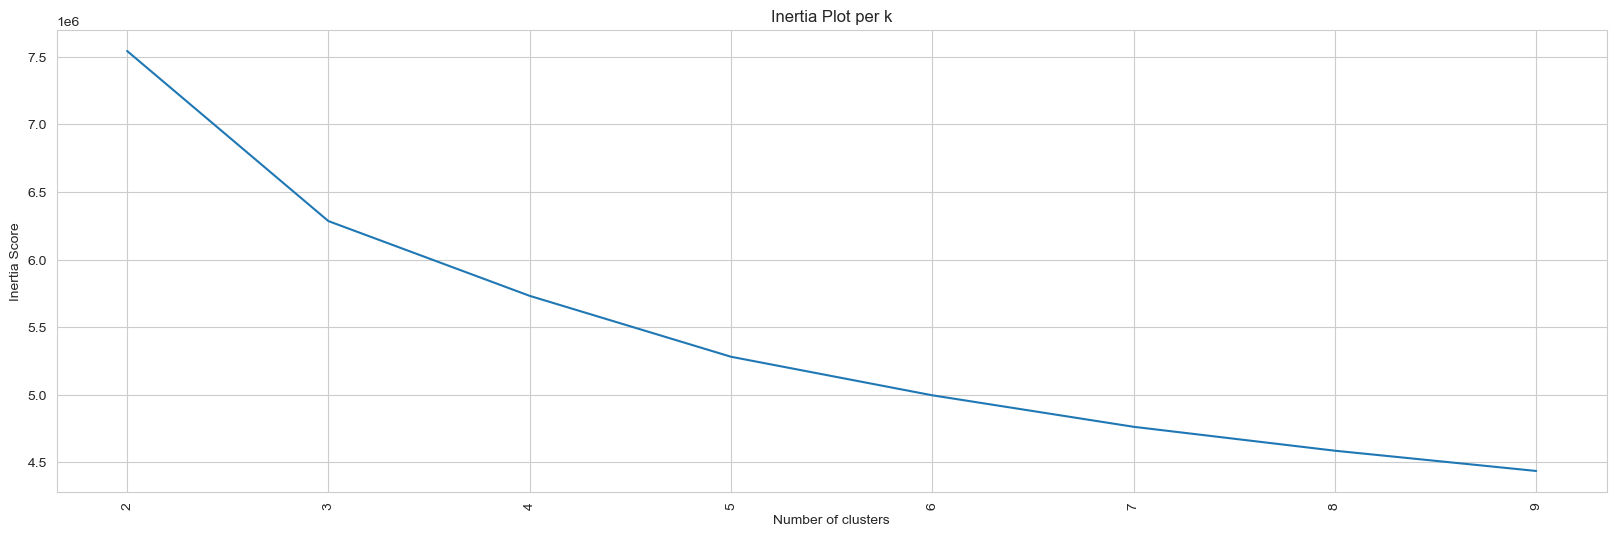

In [31]:
# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize =(20,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

# Note :
from the above plot we can say that the optimal value of k is 5 (using the eblow method )


In [32]:
# RE-RUNNNG K-MEANS ON 5 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# PREDICTIONS FOR NEW DATA
predictions = kmeans.predict(X_train)

# CALCULATING THE COUNTS FOR THE CLUSTER
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# CREATING THE PLOT
countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

# DISPLAY THE PLOT
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,62784,5843,8038,1926,26682


#  Principal COMPONENT ANALYSIS (PCA)

In [34]:
# Etapes :
# -Running Principal Component Analysis (PCA) to visualize & improve results for 5 clusters

# -Identifying the "best" number of components

# -Running PCA again with 9 components

# -Finally re-running K-means with 5 clusters & PCA with 9 components

Explained variance ratio (first two components): [0.59064731 0.1373943 ]


<Figure size 640x480 with 0 Axes>

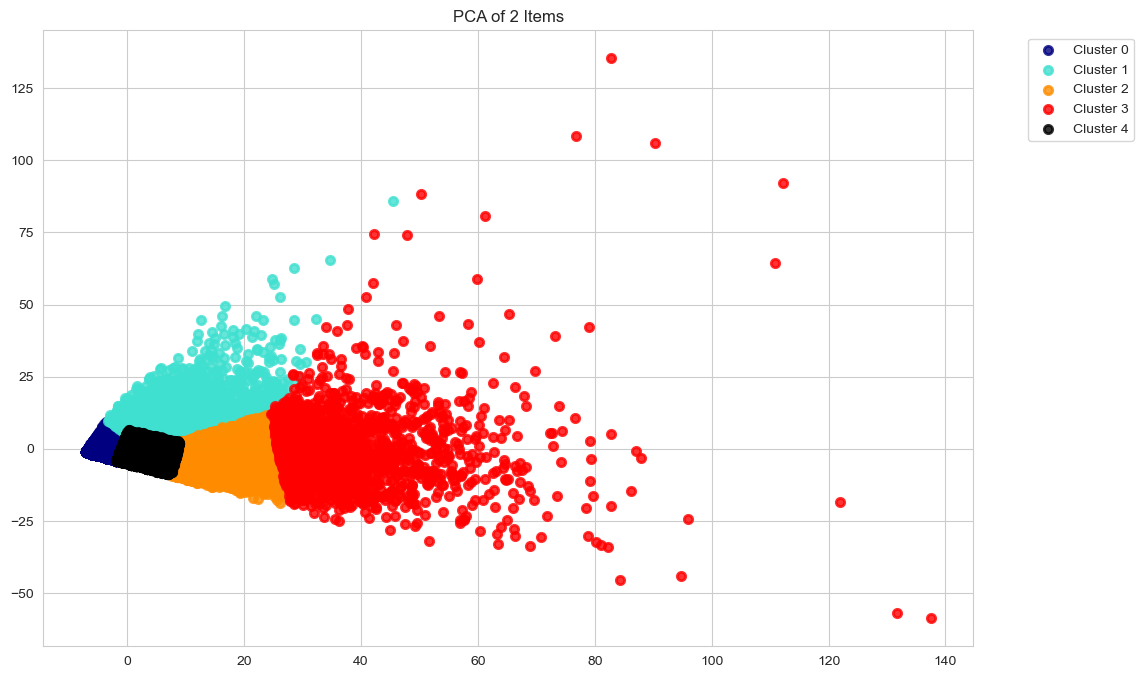

In [42]:
# RUNNING PCA TO VISUALIZE DATA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Total Variance in our dataset is:  113.18063996195697
The 95% variance we want to have is:  107.52160796385911

Variance explain with 4 n_compononets:  95.01640082451127
Variance explain with 8 n_compononets:  105.33440036554832
Variance explain with 9 n_compononets:  106.69075586909074
Variance explain with 10 n_compononets:  107.98339847734042
Variance explain with 15 n_compononets:  112.05606051805331
Variance explain with 18 n_compononets:  113.05270297347101
Variance explain with 21 n_compononets:  113.18063996195697


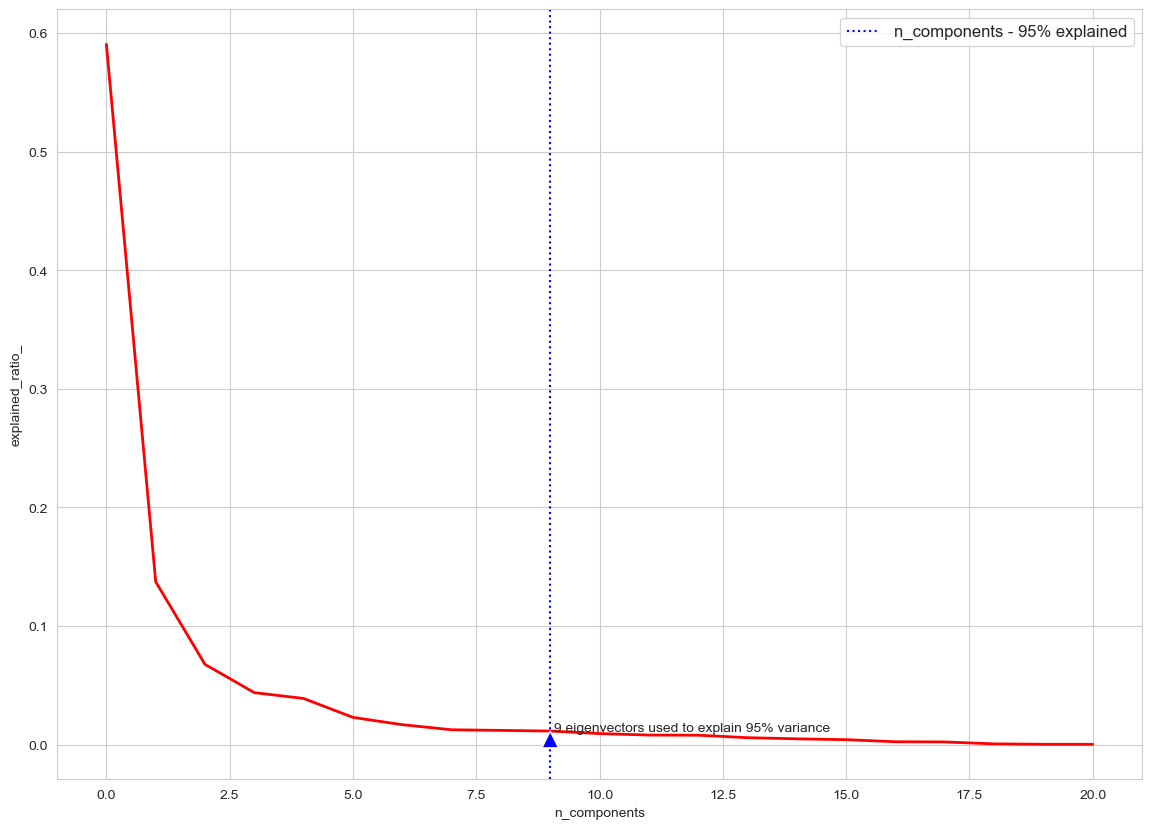

In [51]:
# IDENTIFYING THE "BEST" NUMBER OF COMPONENTS : TRYING WITH DIMENTIONALITY REDUCTION & K-MEANS
n_components = X.shape[1]

# RUNNING PCA WITH ALL COMPONENTS
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)

# CALCULATING THE 95% VARIANCE
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# TRYING TO HIT 95% VARIANCE
print("Variance explain with 4 n_compononets: ", sum(a["Explained Variance"][0:4]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 9 n_compononets: ", sum(a["Explained Variance"][0:9]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))
print("Variance explain with 18 n_compononets: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 21 n_compononets: ", sum(a["Explained Variance"][0:21]))

# PLOTTING DATA POINTS
plt.figure(1, figsize=(14, 10))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
pca.explained_variance_ratio_
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')
# PLOTTING LINE WITH 95% E.V.
plt.axvline(9,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# ADDING ARROW POINTER
plt.annotate(' 9 eigenvectors used to explain 95% variance', xy=(9, pca.explained_variance_ratio_[9]), 
             xytext=(9, pca.explained_variance_ratio_[9]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

# Note:
From the above plot we can see that 9 eigenvectors can be used to represent 95% variance so we will run the PCA again but this time with 9 components

The innertia for : 2 Clusters is: 6860370.37349322
The innertia for : 3 Clusters is: 5601874.036457463
The innertia for : 4 Clusters is: 5048851.917918022
The innertia for : 5 Clusters is: 4598343.43621351
The innertia for : 6 Clusters is: 4313269.845758189
The innertia for : 7 Clusters is: 4080311.6976732877
The innertia for : 8 Clusters is: 3903531.8243353
The innertia for : 9 Clusters is: 3752599.321957308


Text(0.5, 1.0, 'Inertia Plot per k')

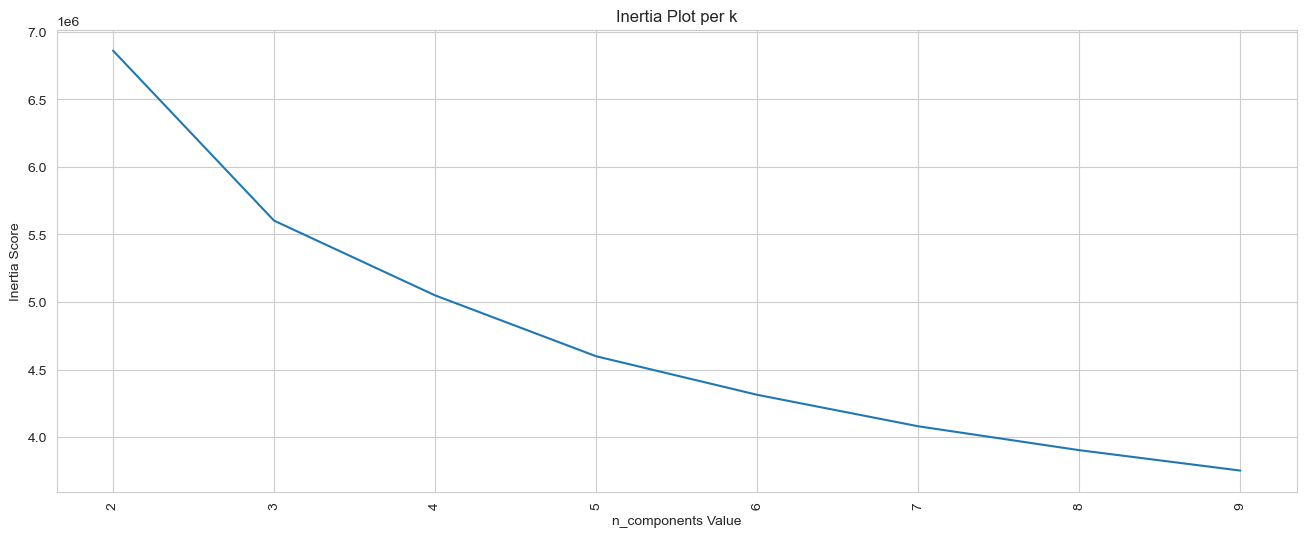

In [52]:
# RUNNING PCA AGAIN WITH 9 COMPONENTS
pca = PCA(n_components=9, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

# RUNNING K-MEANS
for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [53]:
## FINAL STEP:

# RUNNING PCA WITH 9 COMPONENTS
pca = PCA(n_components=9, random_state=453)
X_r = pca.fit(X).transform(X)

# RUNNING K-MEANS WITH 5 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans= kmeans.fit(X_r)

clusters = kmeans.labels_

# ADDING THE CLUSTERS BACK TO THE ORIGINAL DATASET
clst_prd['clusters'] = clusters
# CREATING A CLUSTER CATERGORY
clst_prd["Cluster Category"] = "No Data"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==0]="Cluster 1"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==1]="Cluster 2"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==2]="Cluster 3"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==3]="Cluster 4"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==4]="Cluster 5"

clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,clusters,Cluster Category
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,3,3,0,Cluster 1
3,0,0,0,1,0,0,0,5,0,0,...,0,0,0,1,0,0,6,3,3,Cluster 4
7,0,0,1,7,0,0,2,4,3,0,...,1,0,0,0,0,0,2,3,0,Cluster 1
10,0,0,0,0,0,0,0,5,4,0,...,4,0,0,4,0,0,13,0,3,Cluster 4
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,4,0,0,2,0,0,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,1,0,0,0,0,1,4,0,3,Cluster 4
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,3,0,0,Cluster 1
206206,0,0,0,2,0,0,0,1,1,0,...,1,0,0,0,0,0,1,4,0,Cluster 1
